In [ ]:
#!pip install umap-learn

In [3]:
%matplotlib inline

References: 
   
   - https://umap-learn.readthedocs.io/en/latest/transform.html
   - https://plotly.com/python/t-sne-and-umap-projections/
   - https://pair-code.github.io/understanding-umap/


# UMAP on the MNIST Digits dataset

A simple example demonstrating how to use UMAP on a larger
dataset such as MNIST. We first pull the MNIST dataset and
then use UMAP to reduce it to only 2-dimensions for
easy visualisation.

Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.


In [1]:
import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2024-08-15 12:07:05.980213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 12:07:06.350884: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-15 12:07:06.350903: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-15 12:07:07.547676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
sns.set(context="paper", style="white")

%time mnist = fetch_openml("mnist_784", version=1) #,return_X_y=True)

/home/muller/miniconda3/envs/visual/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


CPU times: user 26.6 s, sys: 2.57 s, total: 29.2 s
Wall time: 29.3 s


In [3]:
reducer = umap.UMAP(random_state=42)

In [4]:
subset_size = 10000

%time embedding1 = reducer.fit_transform(mnist.data[:subset_size])

CPU times: user 33.2 s, sys: 1.88 s, total: 35.1 s
Wall time: 29.7 s


In [5]:
color = mnist.target[:subset_size].astype(int)
# dont show label randomly for X% of points
chosen_idx = np.random.choice(subset_size, replace = False, size = int(0.7*subset_size))
color[chosen_idx] = 10

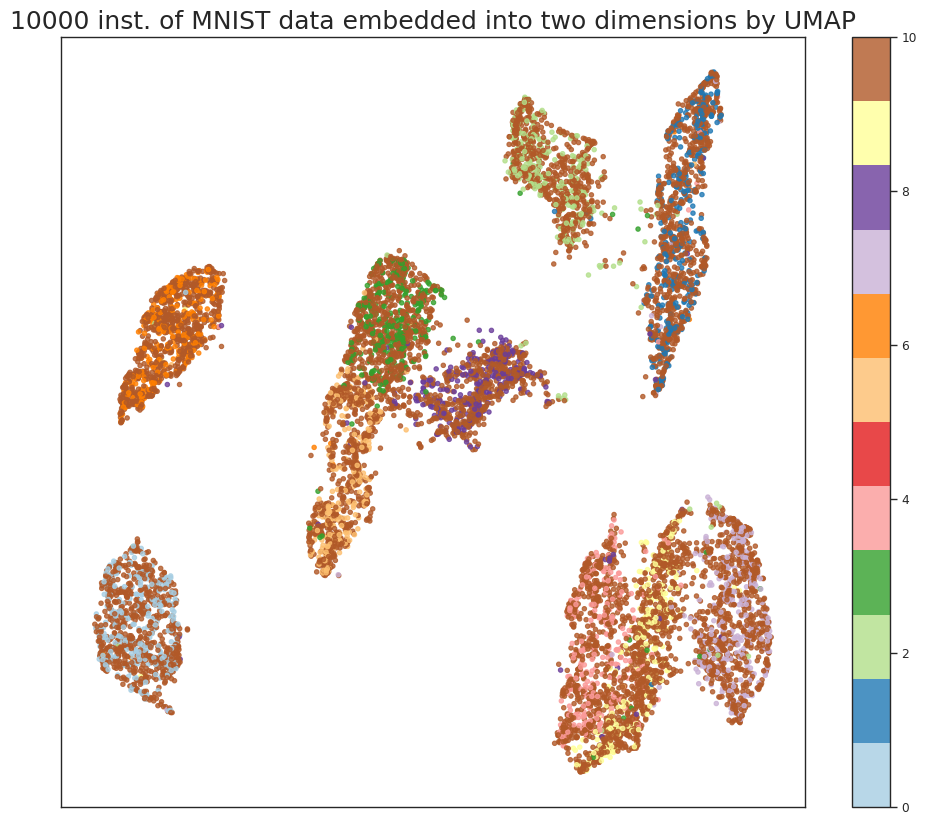

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding1[:, 0], embedding1[:, 1], c=color, cmap = "Paired", s=10, alpha=0.8)
plt.setp(ax, xticks=[], yticks=[])
plt.title(f"{len(embedding1)} inst. of MNIST data embedded into two dimensions by UMAP", fontsize=18)
plt.colorbar()
plt.show()

## Exercice 

sur le modèle du notebook avec Selftraining / Labelpropagation

- entrainez un modèle de K plus proches voisins sur la projection faite par UMAP
- appliquer le selftraining ou une propagation de labels

## Version complète MNIST

In [7]:
%time embedding2 = reducer.fit_transform(mnist.data)

CPU times: user 1min 54s, sys: 27.5 s, total: 2min 21s
Wall time: 48.8 s


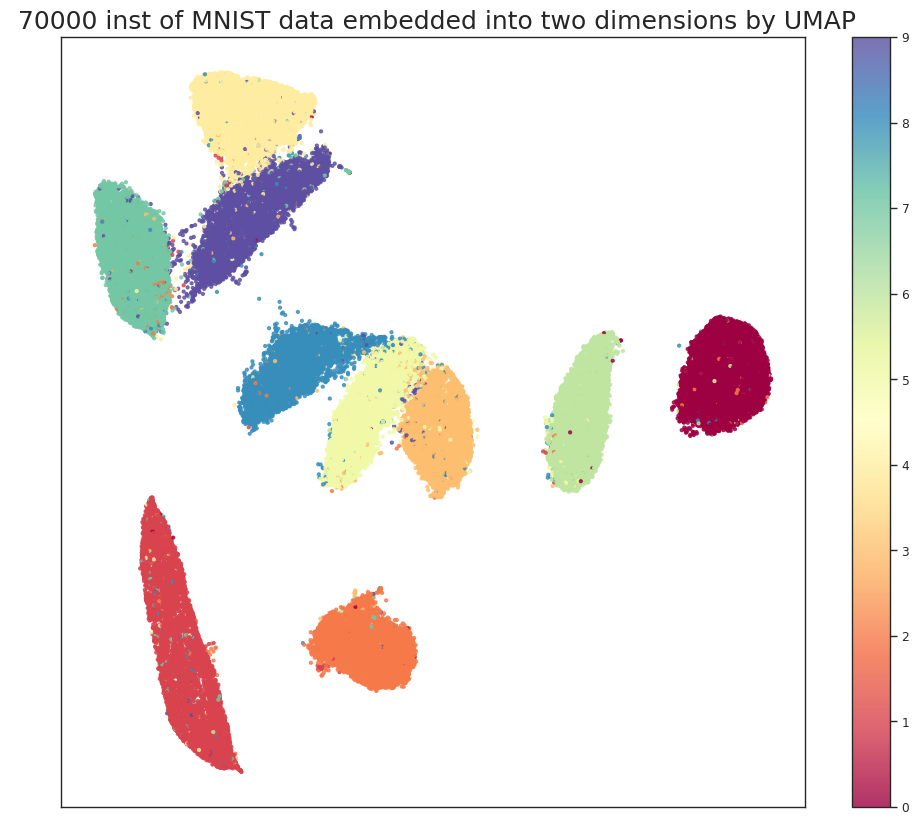

In [8]:
color = mnist.target.astype(int)
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=color, cmap="Spectral", s=5, alpha=0.8)
plt.setp(ax, xticks=[], yticks=[])
plt.title(f" {len(embedding2)} inst of MNIST data embedded into two dimensions by UMAP", fontsize=18)
plt.colorbar()
plt.show()

variantes: class umap.umap_.UMAP(n_neighbors=15, n_components=2, metric='euclidean', n_epochs=None, learning_rate=1.0, init='spectral', min_dist=0.1, spread=1.0, set_op_mix_ratio=1.0, local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, a=None, b=None, random_state=None, metric_kwds=None, angular_rp_forest=False, target_n_neighbors=-1, target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42, verbose=False)

n_neighbours, n_components, metric


    

## Comparaison avec TSNE

In [12]:
%time embedTSNE = TSNE(n_components=2).fit_transform(mnist.data)

CPU times: user 32min 2s, sys: 2min 20s, total: 34min 23s
Wall time: 7min 5s


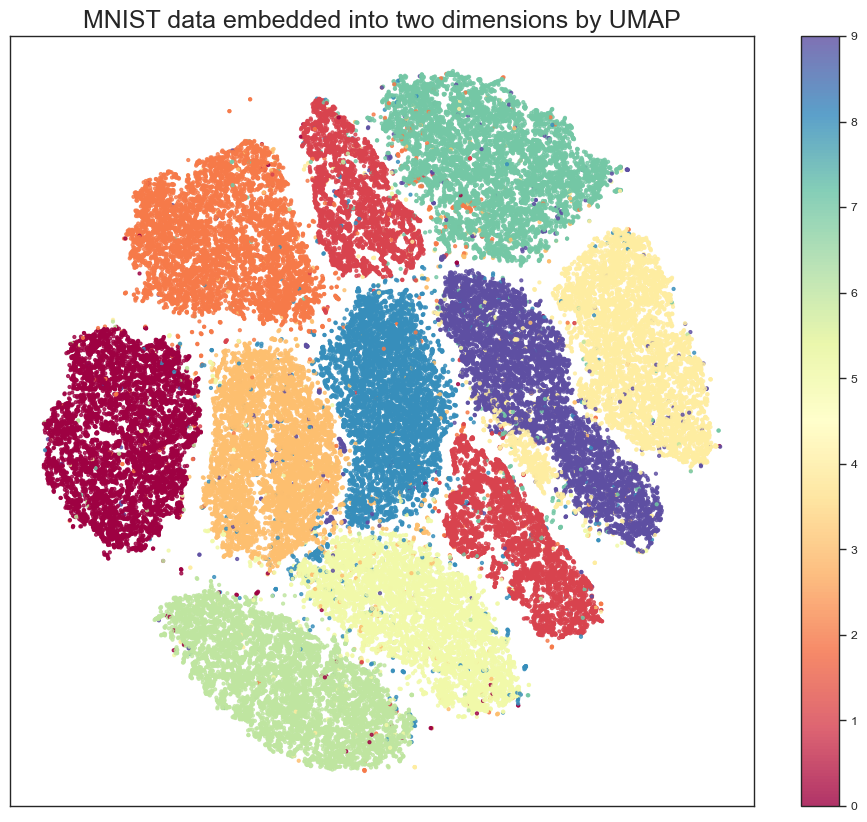

In [13]:
color = mnist.target.astype(int)
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedTSNE[:, 0], embedTSNE[:, 1], c=color, cmap="Spectral", s=5, alpha=0.8)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by TSNE", fontsize=18)
plt.colorbar()
plt.show()

In [22]:
# comparaison KNN + selftraining